In [1]:
!pip install opencv-python


In [2]:
!pip install tensorflow


In [3]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
train_dir = 'C:/Users/hemar/Downloads/WILD ANIMAL DATA/data/train'
val_dir = 'C:/Users/hemar/Downloads/WILD ANIMAL DATA/data/validate'

In [5]:
class_labels = os.listdir(train_dir)
print(class_labels)

['bear', 'cheetah', 'Chimpanzee', 'elephant', 'fox', 'gorilla', 'hyena', 'lion', 'tiger', 'wolf']


In [6]:
train_total = 0
for label in class_labels:
    total = len(os.listdir(os.path.join(train_dir,label)))
    print(label,total)
    train_total +=total
print('Total---',train_total)

bear 80
cheetah 80
Chimpanzee 80
elephant 80
fox 80
gorilla 80
hyena 80
lion 80
tiger 80
wolf 80
Total--- 800


In [7]:
val_total = 0
for label in class_labels:
    total = len(os.listdir(os.path.join(val_dir,label)))
    print(label,total)
    val_total +=total
print('Total---',val_total)

bear 20
cheetah 20
Chimpanzee 20
elephant 20
fox 20
gorilla 20
hyena 20
lion 20
tiger 20
wolf 20
Total--- 200


In [8]:
nb_train_samples = train_total
nb_val_samples = val_total
num_classes = 10
img_rows = 128
img_cols = 128
channel = 3

In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

x_train = []
y_train = []
i = 0
j = 0

for label in class_labels:
    image_names_train = os.listdir(os.path.join(train_dir, label))
    total = len(image_names_train)
    print(label, total)
    
    for image_name in image_names_train:
        try:
            img = image.load_img(os.path.join(train_dir, label, image_name), target_size=(img_rows, img_cols))
            img = image.img_to_array(img)
            img = img / 255
            x_train.append(img)
            y_train.append(j)
        except:
            pass
        i += 1
    j += 1

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train[:nb_train_samples], num_classes)

# Ensure the shapes are correct
assert x_train.shape[1:] == (img_rows, img_cols, channel), f"Expected input shape ({img_rows}, {img_cols}, {channel}), but got {x_train.shape[1:]}"


bear 80
cheetah 80
Chimpanzee 80
elephant 80
fox 80
gorilla 80
hyena 80
lion 80
tiger 80
wolf 80


In [10]:
# Ensure the shapes are correct
assert x_train.shape[3] == channel, f"Expected input shape (?, ?, {channel}), but got {x_train.shape}"
assert y_train.shape[1] == num_classes, f"Expected label shape ({num_classes},), but got {y_train.shape}"

# If the channel dimension is not the last one, you can fix it using the following code
x_train = np.moveaxis(x_train, 3, -1)


In [11]:
x_test = []
y_test = []
i = 0
j = 0

for label in class_labels:
    image_names_val = os.listdir(os.path.join(val_dir, label))
    total = len(image_names_val)
    print(label, total)
    
    for image_name in image_names_val:
        try:
            img = image.load_img(os.path.join(val_dir, label, image_name), target_size=(img_rows, img_cols, channel))
            img = image.img_to_array(img)
            img = img / 255
            x_test.append(img)
            y_test.append(j)
        except:
            pass
        i += 1
    j += 1

x_test = np.array(x_test)
y_test = np.array(y_test)
y_test = to_categorical(y_test[:nb_val_samples], num_classes)


bear 20
cheetah 20
Chimpanzee 20
elephant 20
fox 20
gorilla 20
hyena 20
lion 20
tiger 20
wolf 20


In [12]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 128, 128, 3) (800, 10) (200, 128, 128, 3) (200, 10)


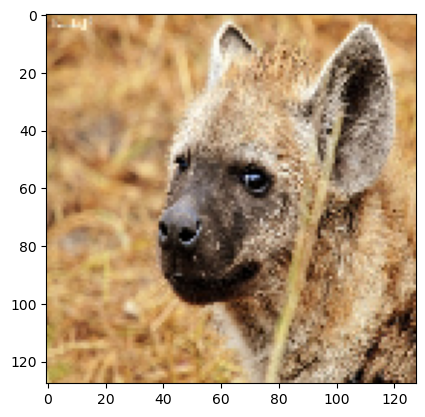

In [13]:
plt.imshow(x_test[120])

# Model Building

In [14]:
model = Sequential()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(img_rows, img_cols, channel)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [36]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)



In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,836,874 (37.52 MB)

 Trainable params: 9,836,874 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(
    x_train,  # Assuming x_train has shape (num_samples, 128, 128, 3)
    y_train,
    batch_size=10,
    epochs=50,
    validation_data=(x_test, y_test),  # Assuming x_test has shape (num_samples, 128, 128, 3)
    shuffle=True
)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 349ms/step - accuracy: 0.1278 - loss: 2.3162 - val_accuracy: 0.1500 - val_loss: 2.0415
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 352ms/step - accuracy: 0.2403 - loss: 1.9749 - val_accuracy: 0.2350 - val_loss: 1.9533
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - accuracy: 0.3878 - loss: 1.6567 - val_accuracy: 0.3800 - val_loss: 1.5632
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 320ms/step - accuracy: 0.4239 - loss: 1.4993 - val_accuracy: 0.3800 - val_loss: 1.5380
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.4938 - loss: 1.3466 - val_accuracy: 0.3350 - val_loss: 1.8700
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 321ms/step - accuracy: 0.5205 - loss: 1.2475 - val_accuracy: 0.4750 - val_loss: 1.4770
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - accuracy: 0.6095 - loss: 1.0491 - val_accuracy: 0.4750 - val_loss: 1.3554
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 411ms/step - accuracy: 0.6905 - loss: 0.8328 - val_accu

In [39]:
y_pred = model.predict(x_test, batch_size=1, verbose=0)

In [40]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

200

In [41]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

200

In [43]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plot the confusion matrix.

    Parameters:
        cm (numpy.ndarray): Confusion matrix
        classes (list): List of class names
        title (str): Title of the plot
        cmap: Color map for the plot
    """
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_confusion_matrix(confusion_matrix, class_labels, title='Confusion Matrix')


In [44]:
cm_plot_labels = class_labels

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_true, y_pred=y_predict))


              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.94      0.80      0.86        20
           2       0.38      0.45      0.41        20
           3       0.62      0.75      0.68        20
           4       0.89      0.40      0.55        20
           5       0.38      0.50      0.43        20
           6       0.44      0.55      0.49        20
           7       0.69      0.45      0.55        20
           8       0.89      0.85      0.87        20
           9       0.40      0.40      0.40        20

    accuracy                           0.58       200
   macro avg       0.62      0.58      0.59       200
weighted avg       0.62      0.58      0.59       200



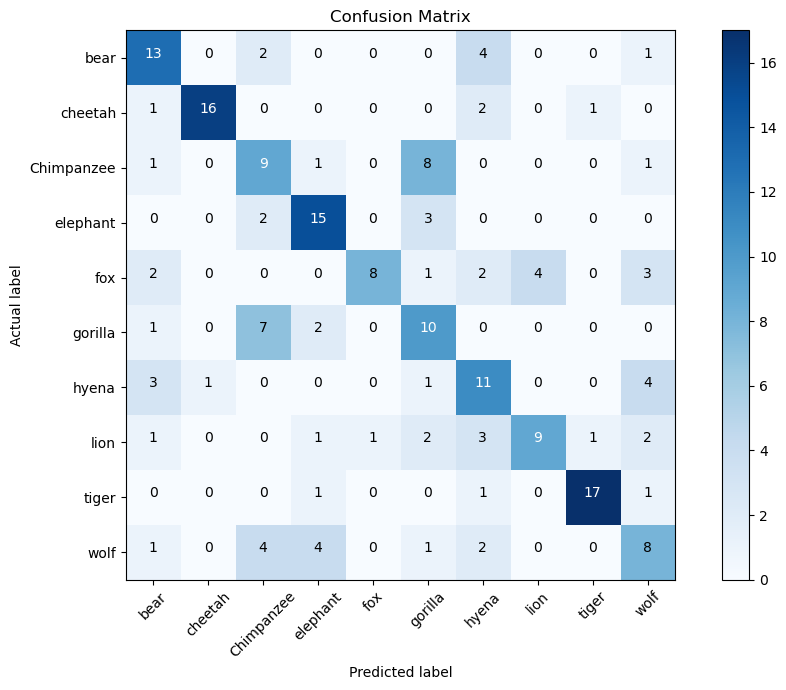

In [46]:
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [48]:
score = model.evaluate(x= x_test, y= y_test, batch_size=32)
print("Test Accuracy:", score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6093 - loss: 2.8683
Test Accuracy: 0.5799999833106995


In [49]:
score = model.evaluate(x= x_train, y= y_train, batch_size=32)
print("Train Accuracy:", score[1])

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 1.0000 - loss: 5.4278e-04
Train Accuracy: 1.0


In [50]:
from pathlib import Path

# Create the directory if it doesn't exist
model_dir = Path("model")
model_dir.mkdir(parents=True, exist_ok=True)

# Save the model structure to the file
model_structure = model.to_json()
json_path = model_dir / "model_structure.json"
json_path.write_text(model_structure)


7293

In [51]:
model.save_weights("model/model_weights.weights.h5")
